Сегодня мы поговорим про различные вариации стохастического градиентного спуска на примере линейной регрессии. Вариации могут идти по трем путям:

1. Вместо использования только одного градиента, как в стохастическом градиентном спуске для обновления веса, мы можем взять совокупность нескольких градиентов. В частности, оптимизаторы, которые мы обсудим, используют экспоненциальное скользящее среднее градиентов.

2. Вместо использования постоянной скорости обучения (learning rate), мы можем использовать адаптивную, меняющуюся от итерации к итерации.

3. Первый и второй варианты совместно.

В следующей таблице представлены методы, которые мы сегодня рассмотрим, в каком году они были представлены, и что именно они модифицируют в стохастическом градиентном спуске. Описания методов были взяты из [статьи](https://towardsdatascience.com/10-gradient-descent-optimisation-algorithms-86989510b5e9). 

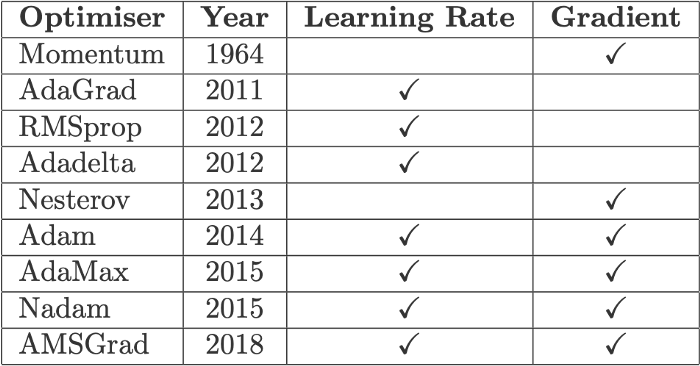

## SGD

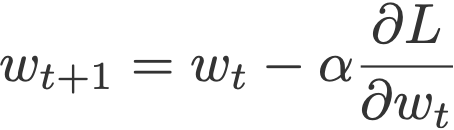

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import random
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import seaborn as sns
import time

def mse(y_true, y_pred):
  return np.average((y_true - y_pred) ** 2, axis=0)[0]

def f(x, w, w0):
  y = x.dot(w) + w0
  return y.reshape(-1, 1)

def plot_learning_curve(history, t, title):
  sns.lineplot(t, history)
  plt.title(title)
  plt.show()

In [4]:
class SGD:
  def fit(self, x, y, epochs=1000, alpha=0.0001):
    assert len(x) == len(y)
    self.w = np.random.random(size=(x.shape[1],1))
    self.w0 = np.random.random()
    loss = []
    t = []
    for epoch in range(epochs):
      n = random.randint(0, len(x)-1)
      x_ = x[n, :]
      y_ = y[n]
      dLdw0 = -2 * (y_ - f(x_, self.w, self.w0)).sum() 
      dLdw = -2 * x_.T.reshape(-1, 1).dot(y_.reshape(-1, 1) - f(x_, self.w, self.w0)).sum() 

      self.w0 = self.w0 -  alpha * dLdw0
      self.w = self.w - alpha * dLdw

      loss.append(mean_squared_error(y, f(x, self.w, self.w0)))
      t.append(time.time())

    return loss, t

  def predict(self, x):
    return f(x, self.w, self.w0)

In [5]:
!wget "https://docs.google.com/uc?export=download&id=1bWp01DceEwx5nXZ1cnuaPod9AV1nEjaf" -O data.csv

--2020-12-22 13:20:34--  https://docs.google.com/uc?export=download&id=1bWp01DceEwx5nXZ1cnuaPod9AV1nEjaf
Resolving docs.google.com (docs.google.com)... 172.217.203.138, 172.217.203.102, 172.217.203.139, ...
Connecting to docs.google.com (docs.google.com)|172.217.203.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-0g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/77t3apkfsk9f5q4tegi78i99lddroous/1608643200000/01540819630670776734/*/1bWp01DceEwx5nXZ1cnuaPod9AV1nEjaf?e=download [following]
--2020-12-22 13:20:34--  https://doc-08-0g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/77t3apkfsk9f5q4tegi78i99lddroous/1608643200000/01540819630670776734/*/1bWp01DceEwx5nXZ1cnuaPod9AV1nEjaf?e=download
Resolving doc-08-0g-docs.googleusercontent.com (doc-08-0g-docs.googleusercontent.com)... 64.233.170.132, 2607:f8b0:400c:c0d::84
Connecting to doc-08-0g-docs.googleusercontent.com (doc-08-

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


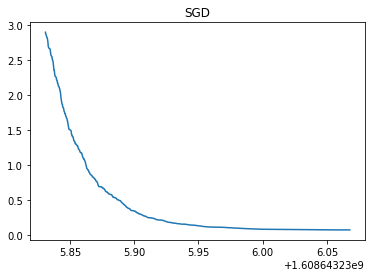

MSE: 0.08438779040097918, Time: 4.00543212890625e-05


In [6]:
data = pd.read_csv('data.csv')
x = np.array(data.drop(columns=['Serial No.', 'Chance of Admit ']))
y = np.array(data['Chance of Admit '])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
x_train, x_test = MinMaxScaler().fit(x).transform(x_train), MinMaxScaler().fit(x).transform(x_test)

start = time.time()
lr = SGD()
end = time.time()
history, t = lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
plot_learning_curve(history, t, 'SGD')
print(f'MSE: {mean_squared_error(y_test, y_pred)}, Time: {end-start}')

## Momentum

Вместо того, чтобы в течение итерации обновлять веса только с помощью текущего градиента, градиентный спуск с импульсом (Momentum) заменяет текущий градиент на m («импульс»), который представляет собой совокупность градиентов -  экспоненциальную скользящую среднюю текущих и прошлых градиентов (до времени t).

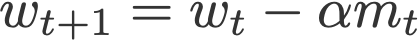

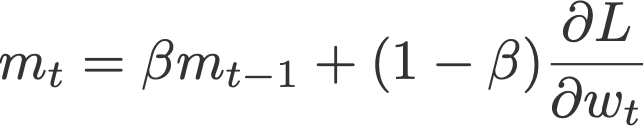

In [86]:
class Momentum:
  def fit(self, x, y, epochs=1000, alpha=0.0001, beta=0.9):
    assert len(x) == len(y)
    self.w = np.random.random(size=(x.shape[1],1))
    self.w0 = np.random.random()
    m = 0
    m0 = 0

    loss = []
    t = []
    for epoch in range(epochs):
      n = random.randint(0, len(x)-1)
      x_ = x[n, :]
      y_ = y[n]

      dLdw0 = -2 * (y_ - f(x_, self.w, self.w0)).sum() 
      dLdw = -2 * x_.T.reshape(-1, 1).dot(y_.reshape(-1, 1) - f(x_, self.w, self.w0)).sum() 

      m0 = beta * m0 + (1 - beta) * dLdw0
      m = beta * m + (1 - beta) * dLdw

      self.w0 = self.w0 -  alpha * m0
      self.w = self.w - alpha * m

      loss.append(mean_squared_error(y, f(x, self.w, self.w0)))
      t.append(time.time())

    return loss, t

  def predict(self, x):
    return f(x, self.w, self.w0)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


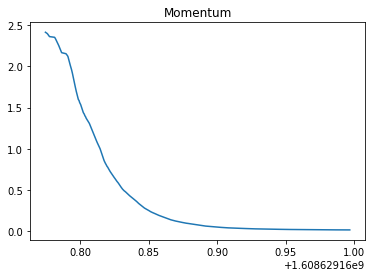

MSE: 0.013624248977291281, Time: 3.719329833984375e-05


In [87]:
start = time.time()
lr = Momentum()
end = time.time()
history, t = lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
plot_learning_curve(history, t, 'Momentum')
print(f'MSE: {mean_squared_error(y_test, y_pred)}, Time: {end-start}')

## AdaGrad

Адаптивный градиент (AdaGrad) воздействует на компонент скорости обучения путем деления скорости обучения на квадратный корень из v, который представляет собой совокупную сумму квадратов текущих и прошлых градиентов (до времени t). Компонент градиента же остается неизменным, как и в SGD.

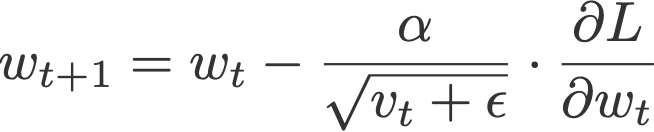

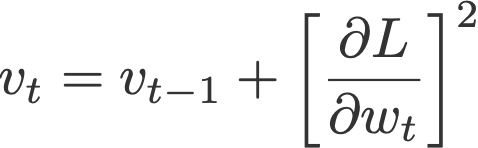

In [88]:
class AdaGrad:
  def fit(self, x, y, epochs=1000, alpha=0.01, e=10e-7):
    assert len(x) == len(y)
    self.w = np.random.random(size=(x.shape[1],1))
    self.w0 = np.random.random()
    v = 0
    v0 = 0

    loss = []
    t = []
    for epoch in range(epochs):
      n = random.randint(0, len(x)-1)
      x_ = x[n, :]
      y_ = y[n]

      dLdw0 = -2 * (y_ - f(x_, self.w, self.w0)).sum() 
      dLdw = -2 * x_.T.reshape(-1, 1).dot(y_.reshape(-1, 1) - f(x_, self.w, self.w0)).sum() 

      v0 = v0 + dLdw0 ** 2
      v = v + dLdw ** 2

      self.w0 = self.w0 -  alpha / (v0 + e)  * dLdw0
      self.w = self.w - alpha / (v + e) * dLdw

      loss.append(mean_squared_error(y, f(x, self.w, self.w0)))
      t.append(time.time())

    return loss, t

  def predict(self, x):
    return f(x, self.w, self.w0)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


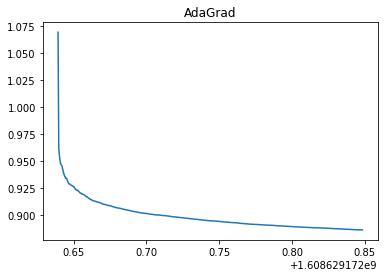

MSE: 0.8968015763372271, Time: 0.00010013580322265625


In [89]:
start = time.time()
lr = AdaGrad()
end = time.time()
history, t = lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
plot_learning_curve(history, t, 'AdaGrad')
print(f'MSE: {mean_squared_error(y_test, y_pred)}, Time: {end-start}')

## RMSprop

RMSprop - это еще один вариант адаптивной скорости, усовершенствование AdaGrad. Вместо того, чтобы брать кумулятивную сумму квадратов градиентов, как в AdaGrad, мы берем экспоненциальное скользящее среднее этих градиентов. 

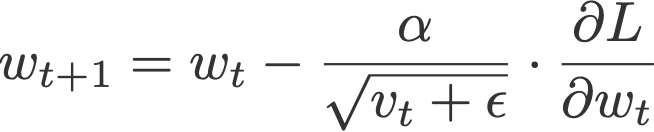

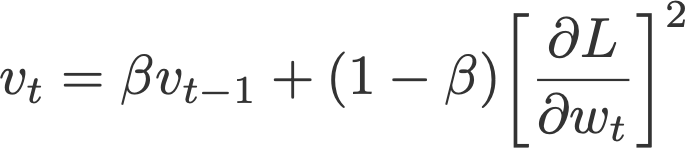

In [90]:
class RMSprop:
  def fit(self, x, y, epochs=1000, alpha=0.001, beta=0.9, e=10e-6):
    assert len(x) == len(y)
    self.w = np.random.random(size=(x.shape[1],1))
    self.w0 = np.random.random()
    v = 0
    v0 = 0

    loss = []
    t = []
    for epoch in range(epochs):
      n = random.randint(0, len(x)-1)
      x_ = x[n, :]
      y_ = y[n]

      dLdw0 = -2 * (y_ - f(x_, self.w, self.w0)).sum() 
      dLdw = -2 * x_.T.reshape(-1, 1).dot(y_.reshape(-1, 1) - f(x_, self.w, self.w0)).sum() 

      v0 = beta * v0 + (1 - beta) * dLdw0 ** 2
      v = beta * v + (1 - beta) * dLdw ** 2

      self.w0 = self.w0 -  alpha / (v0 + e)**0.5  * dLdw0
      self.w = self.w - alpha / (v + e)**0.5 * dLdw

      loss.append(mean_squared_error(y, f(x, self.w, self.w0)))
      t.append(time.time())

    return loss, t

  def predict(self, x):
    return f(x, self.w, self.w0)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


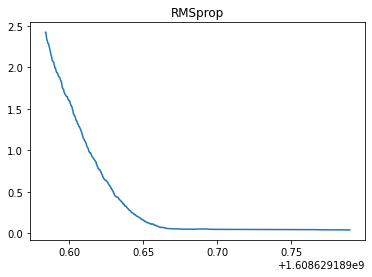

MSE: 0.032635256113471504, Time: 4.839897155761719e-05


In [91]:
start = time.time()
lr = RMSprop()
end = time.time()
history, t = lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
plot_learning_curve(history, t, 'RMSprop')
print(f'MSE: {mean_squared_error(y_test, y_pred)}, Time: {end-start}')

## AdaDelta

Как и RMSprop, Adadelta также является еще одним усовершенствованием AdaGrad с упором на компонент скорости обучения. Adadelta, вероятно, является сокращением от «адаптивной дельты», где дельта здесь относится к разнице между текущим и недавно обновленным весом.
Разница между Adadelta и RMSprop заключается в том, что Adadelta полностью исключает использование параметра скорости обучения, заменяя его на D, экспоненциальное скользящее среднее квадратов дельт.

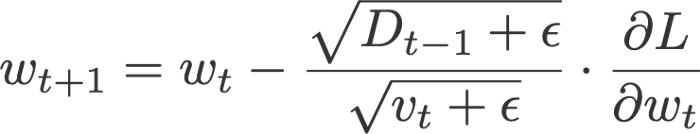

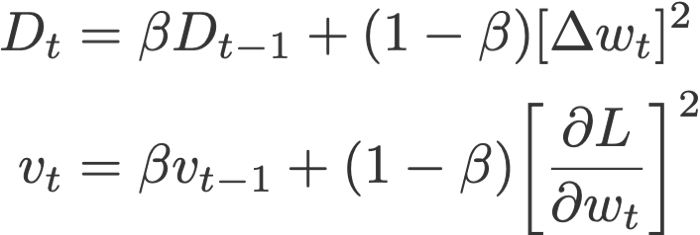

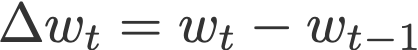

In [92]:
class AdaDelta:
  def fit(self, x, y, epochs=1000, beta=0.95, e=10e-6):
    assert len(x) == len(y)
    self.w = np.random.random(size=(x.shape[1],1))
    self.w0 = np.random.random()
    w0_pred = self.w0
    w_pred = self.w.copy()

    D0 = 0
    D = 0

    v = 0
    v0 = 0

    loss = []
    t = []
    for epoch in range(epochs):
      n = random.randint(0, len(x)-1)
      x_ = x[n, :]
      y_ = y[n]

      dw0 = self.w0 - w0_pred
      dw = self.w - w_pred

      dLdw0 = -2 * (y_ - f(x_, self.w, self.w0)).sum() 
      dLdw = -2 * x_.T.reshape(-1, 1).dot(y_.reshape(-1, 1) - f(x_, self.w, self.w0)).sum() 

      v0 = beta * v0 + (1 - beta) * dLdw0 ** 2
      v = beta * v + (1 - beta) * dLdw ** 2

      D0 = beta * D0 + (1 - beta) * dw0 ** 2
      D = beta * D + (1 - beta) * dw.T.dot(dw)

      self.w0 = self.w0 -  (D0 + e)**0.5 / (v0 + e)**0.5  * dLdw0
      self.w = self.w - (D + e)**0.5 / (v + e)**0.5 * dLdw

      w0_pred = self.w0
      w_pred = self.w

      loss.append(mean_squared_error(y, f(x, self.w, self.w0)))
      t.append(time.time())

    return loss, t

  def predict(self, x):
    return f(x, self.w, self.w0)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


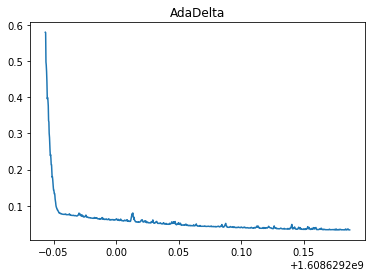

MSE: 0.032813759696138166, Time: 3.933906555175781e-05


In [93]:
start = time.time()
lr = AdaDelta()
end = time.time()
history, t = lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
plot_learning_curve(history, t, 'AdaDelta')
print(f'MSE: {mean_squared_error(y_test, y_pred)}, Time: {end-start}')

## Nesterov Accelerated Gradient (NAG)

Nesterov Accelerated Gradient использует m - экспоненциальное скользящее среднее того, что можно назвать прогнозируемыми градиентами.

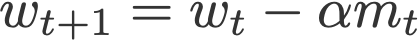

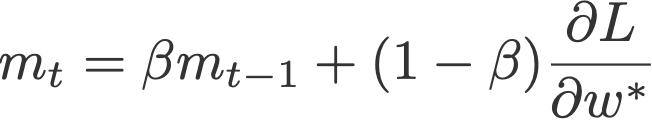

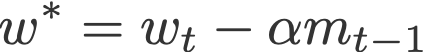

In [9]:
class NAG:
  def fit(self, x, y, epochs=1000, alpha=0.001, beta=0.9):
    assert len(x) == len(y)
    self.w = np.random.random(size=(x.shape[1],1))
    self.w0 = np.random.random()

    m = 0
    m0 = 0

    loss = []
    t = []
    for epoch in range(epochs):
      n = random.randint(0, len(x)-1)
      x_ = x[n, :]
      y_ = y[n]

      w0_ = self.w0 - alpha * m0
      w_ = self.w - alpha * m

      dLdw0_ = -2 * (y_ - f(x_, w_, w0_)).sum() 
      dLdw_ = -2 * x_.T.reshape(-1, 1).dot(y_.reshape(-1, 1) - f(x_, w_, w0_)).sum() 

      m0 = beta * m0 + (1 - beta) * dLdw0_
      m = beta * m + (1 - beta) * dLdw_

      self.w0 = self.w0 - alpha * m0
      self.w = self.w - alpha * m

      loss.append(mean_squared_error(y, f(x, self.w, self.w0)))
      t.append(time.time())

    return loss, t

  def predict(self, x):
    return f(x, self.w, self.w0)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


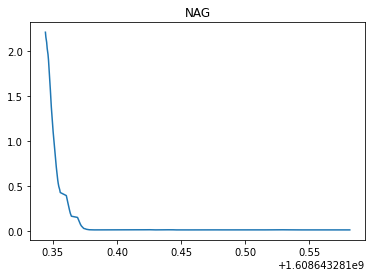

MSE: 0.011317722284888402, Time: 4.029273986816406e-05


In [10]:
start = time.time()
lr = NAG()
end = time.time()
history, t = lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
plot_learning_curve(history, t, 'NAG')
print(f'MSE: {mean_squared_error(y_test, y_pred)}, Time: {end-start}')

## Adam

Adaptive moment estimation (Adam) - это просто комбинация моментума и RMSprop.

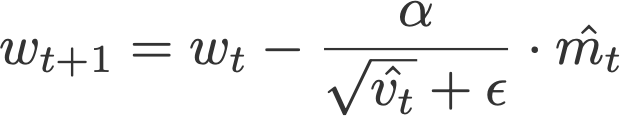

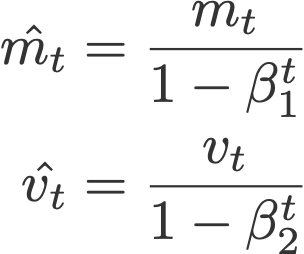

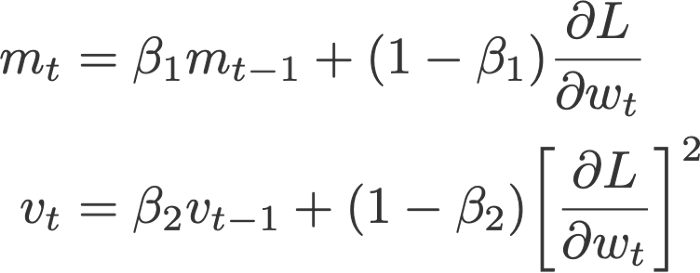

In [96]:
class Adam:
  def fit(self, x, y, epochs=1000, alpha=0.001, beta1=0.9, beta2=0.999, e=10e-8):
    assert len(x) == len(y)
    self.w = np.random.random(size=(x.shape[1],1))
    self.w0 = np.random.random()

    m = 0
    m0 = 0

    v = 0
    v0 = 0

    loss = []
    t = []
    for epoch in range(1, epochs+1):
      n = random.randint(0, len(x)-1)
      x_ = x[n, :]
      y_ = y[n]

      dLdw0 = -2 * (y_ - f(x_, self.w, self.w0)).sum() 
      dLdw = -2 * x_.T.reshape(-1, 1).dot(y_.reshape(-1, 1) - f(x_, self.w, self.w0)).sum() 

      m0 = beta1 * m0 + (1 - beta1) * dLdw0
      m = beta1 * m + (1 - beta1) * dLdw

      v0 = beta2 * v0 + (1 - beta2) * dLdw0 ** 2
      v = beta2 * v + (1 - beta2) * dLdw ** 2

      m0hat = m0 / (1 - beta2 ** epoch)
      mhat = m / (1 - beta2 ** epoch)

      v0hat = v0 / (1 - beta2 ** epoch)
      vhat = v / (1 - beta2 ** epoch)

      self.w0 = self.w0 - alpha / (v0hat**0.5 + e) * m0hat
      self.w = self.w - alpha / (vhat**0.5 + e) * mhat

      loss.append(mean_squared_error(y, f(x, self.w, self.w0)))
      t.append(time.time())

    return loss, t

  def predict(self, x):
    return f(x, self.w, self.w0)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


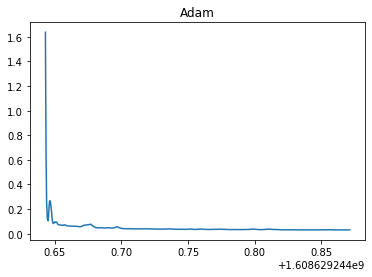

MSE: 0.026473652097886047, Time: 6.771087646484375e-05


In [97]:
start = time.time()
lr = Adam()
end = time.time()
history, t = lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
plot_learning_curve(history, t, 'Adam')
print(f'MSE: {mean_squared_error(y_test, y_pred)}, Time: {end-start}')

## AdaMax

AdaMax - адаптация оптимизатора Adam от тех же авторов.

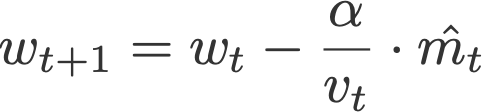

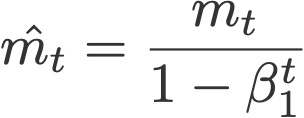

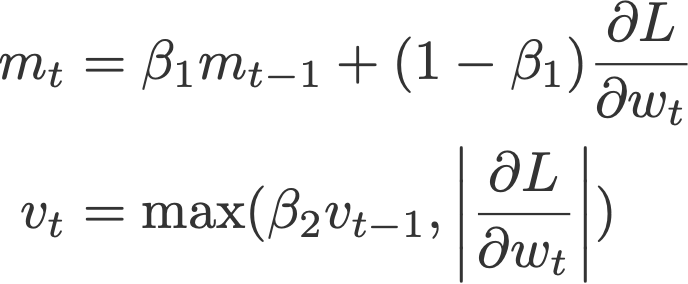

In [98]:
class AdaMax:
  def fit(self, x, y, epochs=1000, alpha=0.002, beta1=0.9, beta2=0.999):
    assert len(x) == len(y)
    self.w = np.random.random(size=(x.shape[1],1))
    self.w0 = np.random.random()

    m = 0
    m0 = 0

    v = 0
    v0 = 0

    loss = []
    t = []
    for epoch in range(1, epochs+1):
      n = random.randint(0, len(x)-1)
      x_ = x[n, :]
      y_ = y[n]

      dLdw0 = -2 * (y_ - f(x_, self.w, self.w0)).sum() 
      dLdw = -2 * x_.T.reshape(-1, 1).dot(y_.reshape(-1, 1) - f(x_, self.w, self.w0)).sum() 

      m0 = beta1 * m0 + (1 - beta1) * dLdw0
      m = beta1 * m + (1 - beta1) * dLdw

      v0 = max(beta2 * v0, dLdw0)
      v = np.max([beta2 * v, dLdw])

      m0hat = m0 / (1 - beta1 ** epoch)
      mhat = m / (1 - beta1 ** epoch)

      self.w0 = self.w0 - alpha / v0 * m0hat
      self.w = self.w - alpha / v * mhat

      loss.append(mean_squared_error(y, f(x, self.w, self.w0)))
      t.append(time.time())

    return loss, t

  def predict(self, x):
    return f(x, self.w, self.w0)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


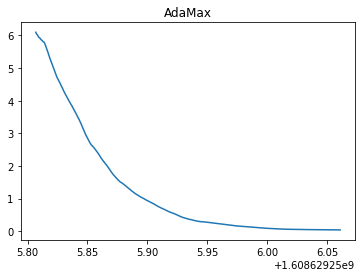

MSE: 0.037843684034066905, Time: 6.246566772460938e-05


In [100]:
start = time.time()
lr = AdaMax()
end = time.time()
history, t = lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
plot_learning_curve(history, t, 'AdaMax')
print(f'MSE: {mean_squared_error(y_test, y_pred)}, Time: {end-start}')

## Nadam

Nadam = Nesterov + Adam. Но компонент Нестерова взят чуть более эффективный.

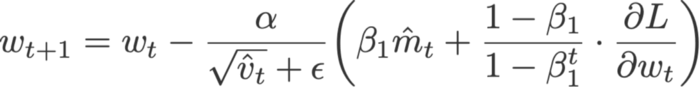

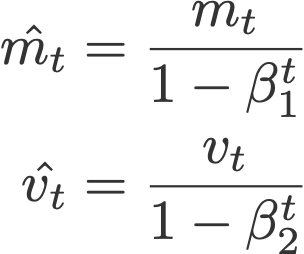

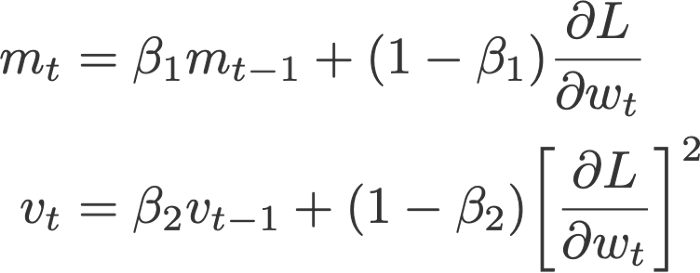

In [11]:
class Nadam:
  def fit(self, x, y, epochs=1000, alpha=0.001, beta1=0.9, beta2=0.999, e=10e-7):
    assert len(x) == len(y)
    self.w = np.random.random(size=(x.shape[1],1))
    self.w0 = np.random.random()

    m = 0
    m0 = 0

    v = 0
    v0 = 0

    loss = []
    t = []
    for epoch in range(1, epochs+1):
      n = random.randint(0, len(x)-1)
      x_ = x[n, :]
      y_ = y[n]

      dLdw0 = -2 * (y_ - f(x_, self.w, self.w0)).sum() 
      dLdw = -2 * x_.T.reshape(-1, 1).dot(y_.reshape(-1, 1) - f(x_, self.w, self.w0)).sum() 

      m0 = beta1 * m0 + (1 - beta1) * dLdw0
      m = beta1 * m + (1 - beta1) * dLdw

      v0 = beta2 * v0 + (1 - beta2) * dLdw0 ** 2
      v = beta2 * v + (1 - beta2) * dLdw ** 2

      m0hat = m0 / (1 - beta2 ** epoch)
      mhat = m / (1 - beta2 ** epoch)

      v0hat = v0 / (1 - beta2 ** epoch)
      vhat = v / (1 - beta2 ** epoch)

      self.w0 = self.w0 - alpha / (v0hat**0.5 + e) * (beta1 * m0hat + (1 - beta1) / (1 - beta1 ** epoch) * dLdw0)
      self.w = self.w - alpha / (vhat**0.5 + e) * (beta1 * mhat + (1 - beta1) / (1 - beta1 ** epoch) * dLdw)

      loss.append(mean_squared_error(y, f(x, self.w, self.w0)))
      t.append(time.time())

    return loss, t

  def predict(self, x):
    return f(x, self.w, self.w0)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


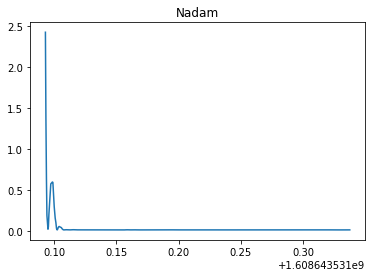

MSE: 0.012861079282284978, Time: 6.794929504394531e-05


In [12]:
start = time.time()
lr = Nadam()
end = time.time()
history, t = lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
plot_learning_curve(history, t, 'Nadam')
print(f'MSE: {mean_squared_error(y_test, y_pred)}, Time: {end-start}')

## AMSGrad

Еще одна вариация Adam. Она пересматривает компонент адаптивной скорости обучения в Адаме и изменяет его, чтобы гарантировать, что текущее v всегда больше, чем v из предыдущего временного шага.

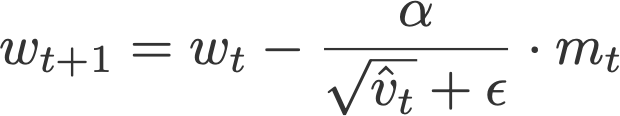

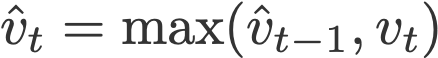

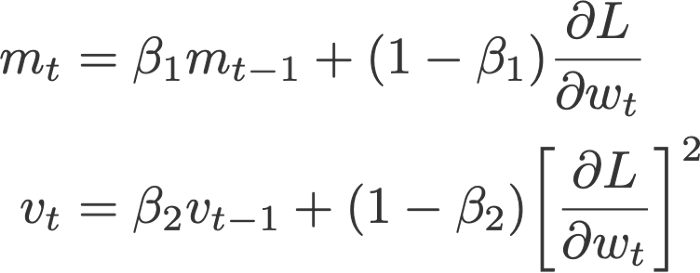

In [15]:
class AMSGrad:
  def fit(self, x, y, epochs=1000, alpha=0.001, beta1=0.9, beta2=0.999, e=10e-7):
    assert len(x) == len(y)
    self.w = np.random.random(size=(x.shape[1],1))
    self.w0 = np.random.random()

    m = 0
    m0 = 0

    v = 0
    v0 = 0

    vhat = 0
    v0hat = 0

    loss = []
    t = []
    for epoch in range(1, epochs+1):
      n = random.randint(0, len(x)-1)
      x_ = x[n, :]
      y_ = y[n]

      dLdw0 = -2 * (y_ - f(x_, self.w, self.w0)).sum() 
      dLdw = -2 * x_.T.reshape(-1, 1).dot(y_.reshape(-1, 1) - f(x_, self.w, self.w0)).sum() 

      m0 = beta1 * m0 + (1 - beta1) * dLdw0
      m = beta1 * m + (1 - beta1) * dLdw

      v0 = beta2 * v0 + (1 - beta2) * dLdw0 ** 2
      v = beta2 * v + (1 - beta2) * dLdw ** 2

      v0hat = max(v0hat, v0)
      vhat = max(vhat, v)

      self.w0 = self.w0 - alpha / (v0hat**0.5 + e) * m0
      self.w = self.w - alpha / (vhat**0.5 + e) * m
      loss.append(mean_squared_error(y, f(x, self.w, self.w0)))
      t.append(time.time())

    return loss, t

  def predict(self, x):
    return f(x, self.w, self.w0)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


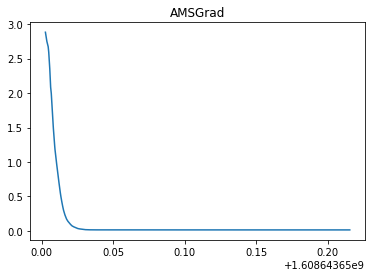

MSE: 0.01056009579871821, Time: 7.390975952148438e-05


In [16]:
start = time.time()
lr = AMSGrad()
end = time.time()
history, t = lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
plot_learning_curve(history, t, 'AMSGrad')
print(f'MSE: {mean_squared_error(y_test, y_pred)}, Time: {end-start}')